In [24]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
from os import listdir
from os.path import isfile, join


Using TensorFlow backend.


In [15]:
files

['MITface/0000_-24_0_0_15_60_1.pgm',
 'MITface/0000_-8_0_0_60_0_1.pgm',
 'MITface/0000_-12_0_0_30_45_1.pgm',
 'MITface/0000_0_0_0_30_60_1.pgm',
 'MITface/0000_-8_0_0_30_60_1.pgm',
 'MITface/0000_-8_0_0_60_45_1.pgm',
 'MITface/0000_0_0_0_45_75_1.pgm',
 'MITface/0000_-4_0_0_75_30_1.pgm',
 'MITface/0000_-8_0_0_75_60_1.pgm',
 'MITface/0000_-16_0_0_60_60_1.pgm',
 'MITface/0000_-4_0_0_90_45_1.pgm',
 'MITface/0000_-20_0_0_30_75_1.pgm',
 'MITface/0000_-12_0_0_90_60_1.pgm',
 'MITface/0000_0_0_0_45_60_1.pgm',
 'MITface/0000_-8_0_0_75_30_1.pgm',
 'MITface/0000_-4_0_0_90_30_1.pgm',
 'MITface/0000_-20_0_0_90_45_1.pgm',
 'MITface/0000_-12_0_0_75_30_1.pgm',
 'MITface/0000_-12_0_0_30_15_1.pgm',
 'MITface/0000_0_0_0_75_75_1.pgm',
 'MITface/0000_-12_0_0_15_45_1.pgm',
 'MITface/0000_-20_0_0_60_60_1.pgm',
 'MITface/0000_-8_0_0_60_15_1.pgm',
 'MITface/0000_-16_0_0_45_30_1.pgm',
 'MITface/0000_-20_0_0_30_0_1.pgm',
 'MITface/0000_-4_0_0_90_60_1.pgm',
 'MITface/0000_0_0_0_45_15_1.pgm',
 'MITface/0000_-16_0_0_

In [16]:
import re
import numpy

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return numpy.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))



In [20]:
face=[]

for file in files:     
    f=read_pgm(file)
    face.append(f)
    
face =np.asarray(face)
face.shape

(202, 200, 200)

In [43]:
#aa =read_pgm('0000_-12_0_0_15_0_1.pgm')
#aa

array([[28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       ...,
       [28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28]], dtype=uint8)

In [47]:

face = face.astype('float32') / 255.
img_rows = face.shape[0]
img_cols = face.shape[1]
img_cols

200

In [54]:
aa

array([[0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
        0.10980392],
       [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
        0.10980392],
       [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
        0.10980392],
       ...,
       [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
        0.10980392],
       [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
        0.10980392],
       [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
        0.10980392]], dtype=float32)

In [56]:
aa[100]

array([0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.10980392, 0.10980392, 0.10980392,
       0.10980392, 0.10980392, 0.33333334, 0.34117648, 0.35686275,
       0.38039216, 0.4       , 0.41960785, 0.4627451 , 0.4627451 ,
       0.49803922, 0.5058824 , 0.53333336, 0.5176471 , 0.5372549 ,
       0.5372549 , 0.52156866, 0.54509807, 0.54509807, 0.54509807,
       0.53333336, 0.5137255 , 0.50980395, 0.5058824 , 0.4392157 ,
       0.33333334, 0.27450982, 0.39215687, 0.41960785, 0.39215

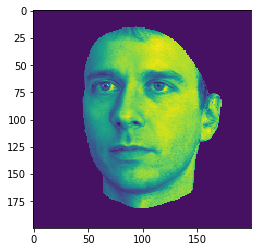

In [58]:


plt.imshow(aa)

In [ ]:
# split data into train / validation folds
image_size = x_train.shape[1]
original_dim = image_size * image_size
img_rows = x_train.shape[1]
img_cols
n_pixels = img_rows * img_cols
#x_train = ff[:1800]
#x_test = ff[1800:1900]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), n_pixels))
x_test = x_test.reshape((len(x_test), n_pixels))